In [211]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Technical Indicators

In [212]:
data = pd.read_csv("../datasets/rates_2017_january_may_1min.csv")

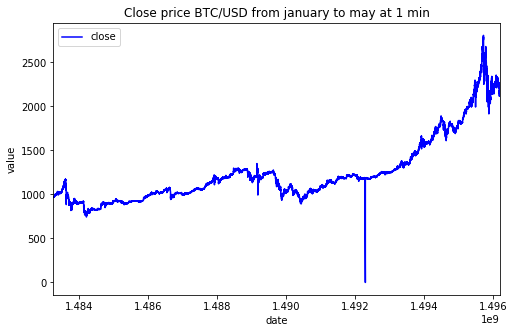

In [213]:
data.plot(style='b',
          figsize=(8,5),
          x='time', 
          y='close', 
          title='Close price BTC/USD from january to may at 1 min',
         )
plt.xlabel('date')
plt.ylabel('value')

In [214]:
## Changing default index to timestamps
data.index = data['time']
data = data.drop('time', axis=1)

In [215]:
data.head()

,low,high,open,close,volume
time,,,,,
1483250400,966.92,967.00,966.92,966.99,0.31111
1483250460,966.70,966.74,966.74,966.70,0.46780
1483250520,966.80,966.98,966.98,966.80,0.61248
1483250580,966.75,966.79,966.79,966.79,0.62527
1483250700,966.81,966.81,966.81,966.81,0.23379


In [216]:
## Define an interval to plot
interv = (data.index > 1488040000) &   (data.index < 1488045000)

In [217]:
## Define some function
def rsi(window, prices):
    delta = prices.diff()
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0
    RolUp = dUp.rolling(window=window, center=False).mean()
    RolDown = dDown.rolling(window=window, center=False).mean().abs()
    RS = RolUp / RolDown
    rsi = 100 - (100 / (1 + RS))
    return rsi

In [218]:
## Compute indicators
data['sma5'] = data['close'].rolling(window=5, center=False).mean()
data['sma10'] = data['close'].rolling(window=10, center=False).mean()
data['bb_upper_10'] = data['sma10'] + 2* data['close'].rolling(window=10, center=False).std()
data['bb_lower_10'] = data['sma10'] - 2* data['close'].rolling(window=10, center=False).std()
data['sma5_norm'] = data['sma5'] / data['close'] -1
data['sma10_norm'] = data['sma10'] / data['close'] -1
data['bbvalue'] = (data['close'] - data['sma10']) / (2 * data['close'].rolling(window=10, center=False).std())
data['rsi9'] = rsi(9, data['close'])
data['rsi14'] = rsi(14, data['close'])

### SMA 5 & 10 Normalized

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf5e78fad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fdf5ddd2050>], dtype=object)

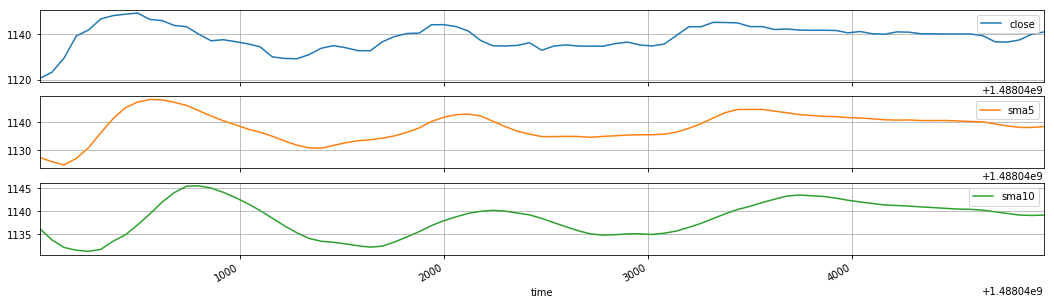

In [219]:
to_plot = data[['close', 'sma5', 'sma10']][interv]
to_plot.plot(figsize=(18,5), grid=True, subplots=True)

### Bollinger Band value

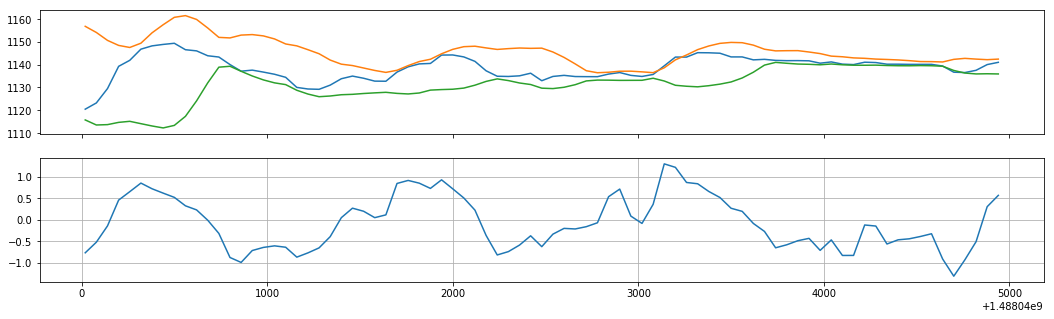

In [220]:
f, axarr = plt.subplots(2, sharex=True, figsize=(18,5))
plt.grid()
axarr[0].plot(data[['close', 'bb_upper_10', 'bb_lower_10']][interv])
axarr[1].plot(data['bbvalue'][interv])

### Relative Strength Index 9 & 14

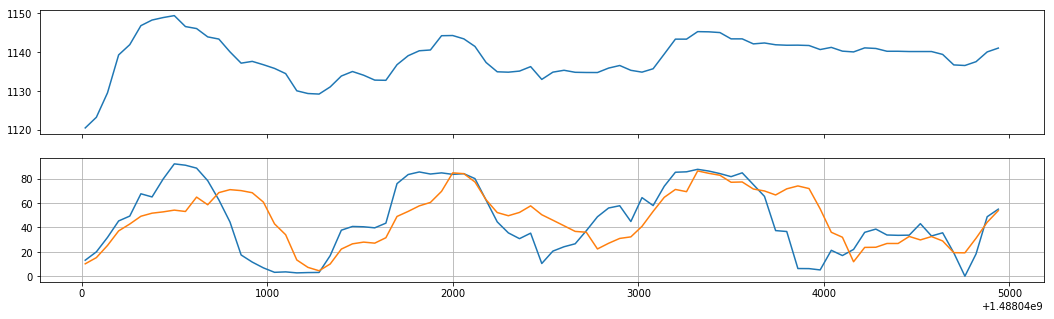

In [224]:
f, axarr = plt.subplots(2, sharex=True, figsize=(18,5))
plt.grid()
axarr[0].plot(data['close'][interv])
axarr[1].plot(data[['rsi9', 'rsi14']][interv])